## EDA Questions Outline

* What features of the dataset are primary determinants of customer churn?

* Are customers within certain areas or states more or less likely to churn?

* International vs national effect on Churn


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Cleaned_SyriaTel_.csv')

In [3]:
df.drop('Unnamed: 0',axis=1, inplace = True)

### Churn Rate

- 14.5% of customers have ended their subscriptions with SyriaTel (0)

- 85.5% of the customers have maintained their subscription (1)

- May need to use SMOTE to balance 

In [4]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [52]:
df

state  account_length  area_code  international_plan  voice_mail_plan  \
0       KS             128        415                   0                1   
1       OH             107        415                   0                1   
2       NJ             137        415                   0                0   
3       OH              84        408                   1                0   
4       OK              75        415                   1                0   
...    ...             ...        ...                 ...              ...   
3328    AZ             192        415                   0                1   
3329    WV              68        415                   0                0   
3330    RI              28        510                   0                0   
3331    CT             184        510                   1                0   
3332    TN              74        415                   0                1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     36              156.2               77   
3329                      0              231.1               57   
3330                      0              180.8              109   
3331                      0              213.8              105   
3332                     25              234.4              113   

      total_day_charge  total_eve_minutes  ...  total_night_calls  \
0                45.07              197.4  ...                 91   
1                27.47              195.5  ...                103   
2                41.38              121.2  ...                104   
3                50.90               61.9  ...                 89   
4                28.34              148.3  ...                121   
...                ...                ...  ...                ...   
3328             26.55              215.5  ...                 83   
3329             39.29              153.4  ...                123   
3330             30.74              288.8  ...                 91   
3331             36.35              159.6  ...                137   
3332             39.85              265.9  ...                 77   

      total_night_charge  total_intl_minutes  total_intl_calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total_intl_charge  customer_service_calls  churn  total_charges  \
0                  2.70                       1      0          75.56   
1                  3.70                       1      0          59.24   
2                  3.29                       0      0          62.29   
3                  1.78                       2      0          66.80   
4                  2.73                       3      0          52.09   
...                 ...                     ...    ...            ...   
3328               2.67                       2      0          60.10   
3329               2.59                       3      0   

### Correlation Matrix for Base Feature Selection

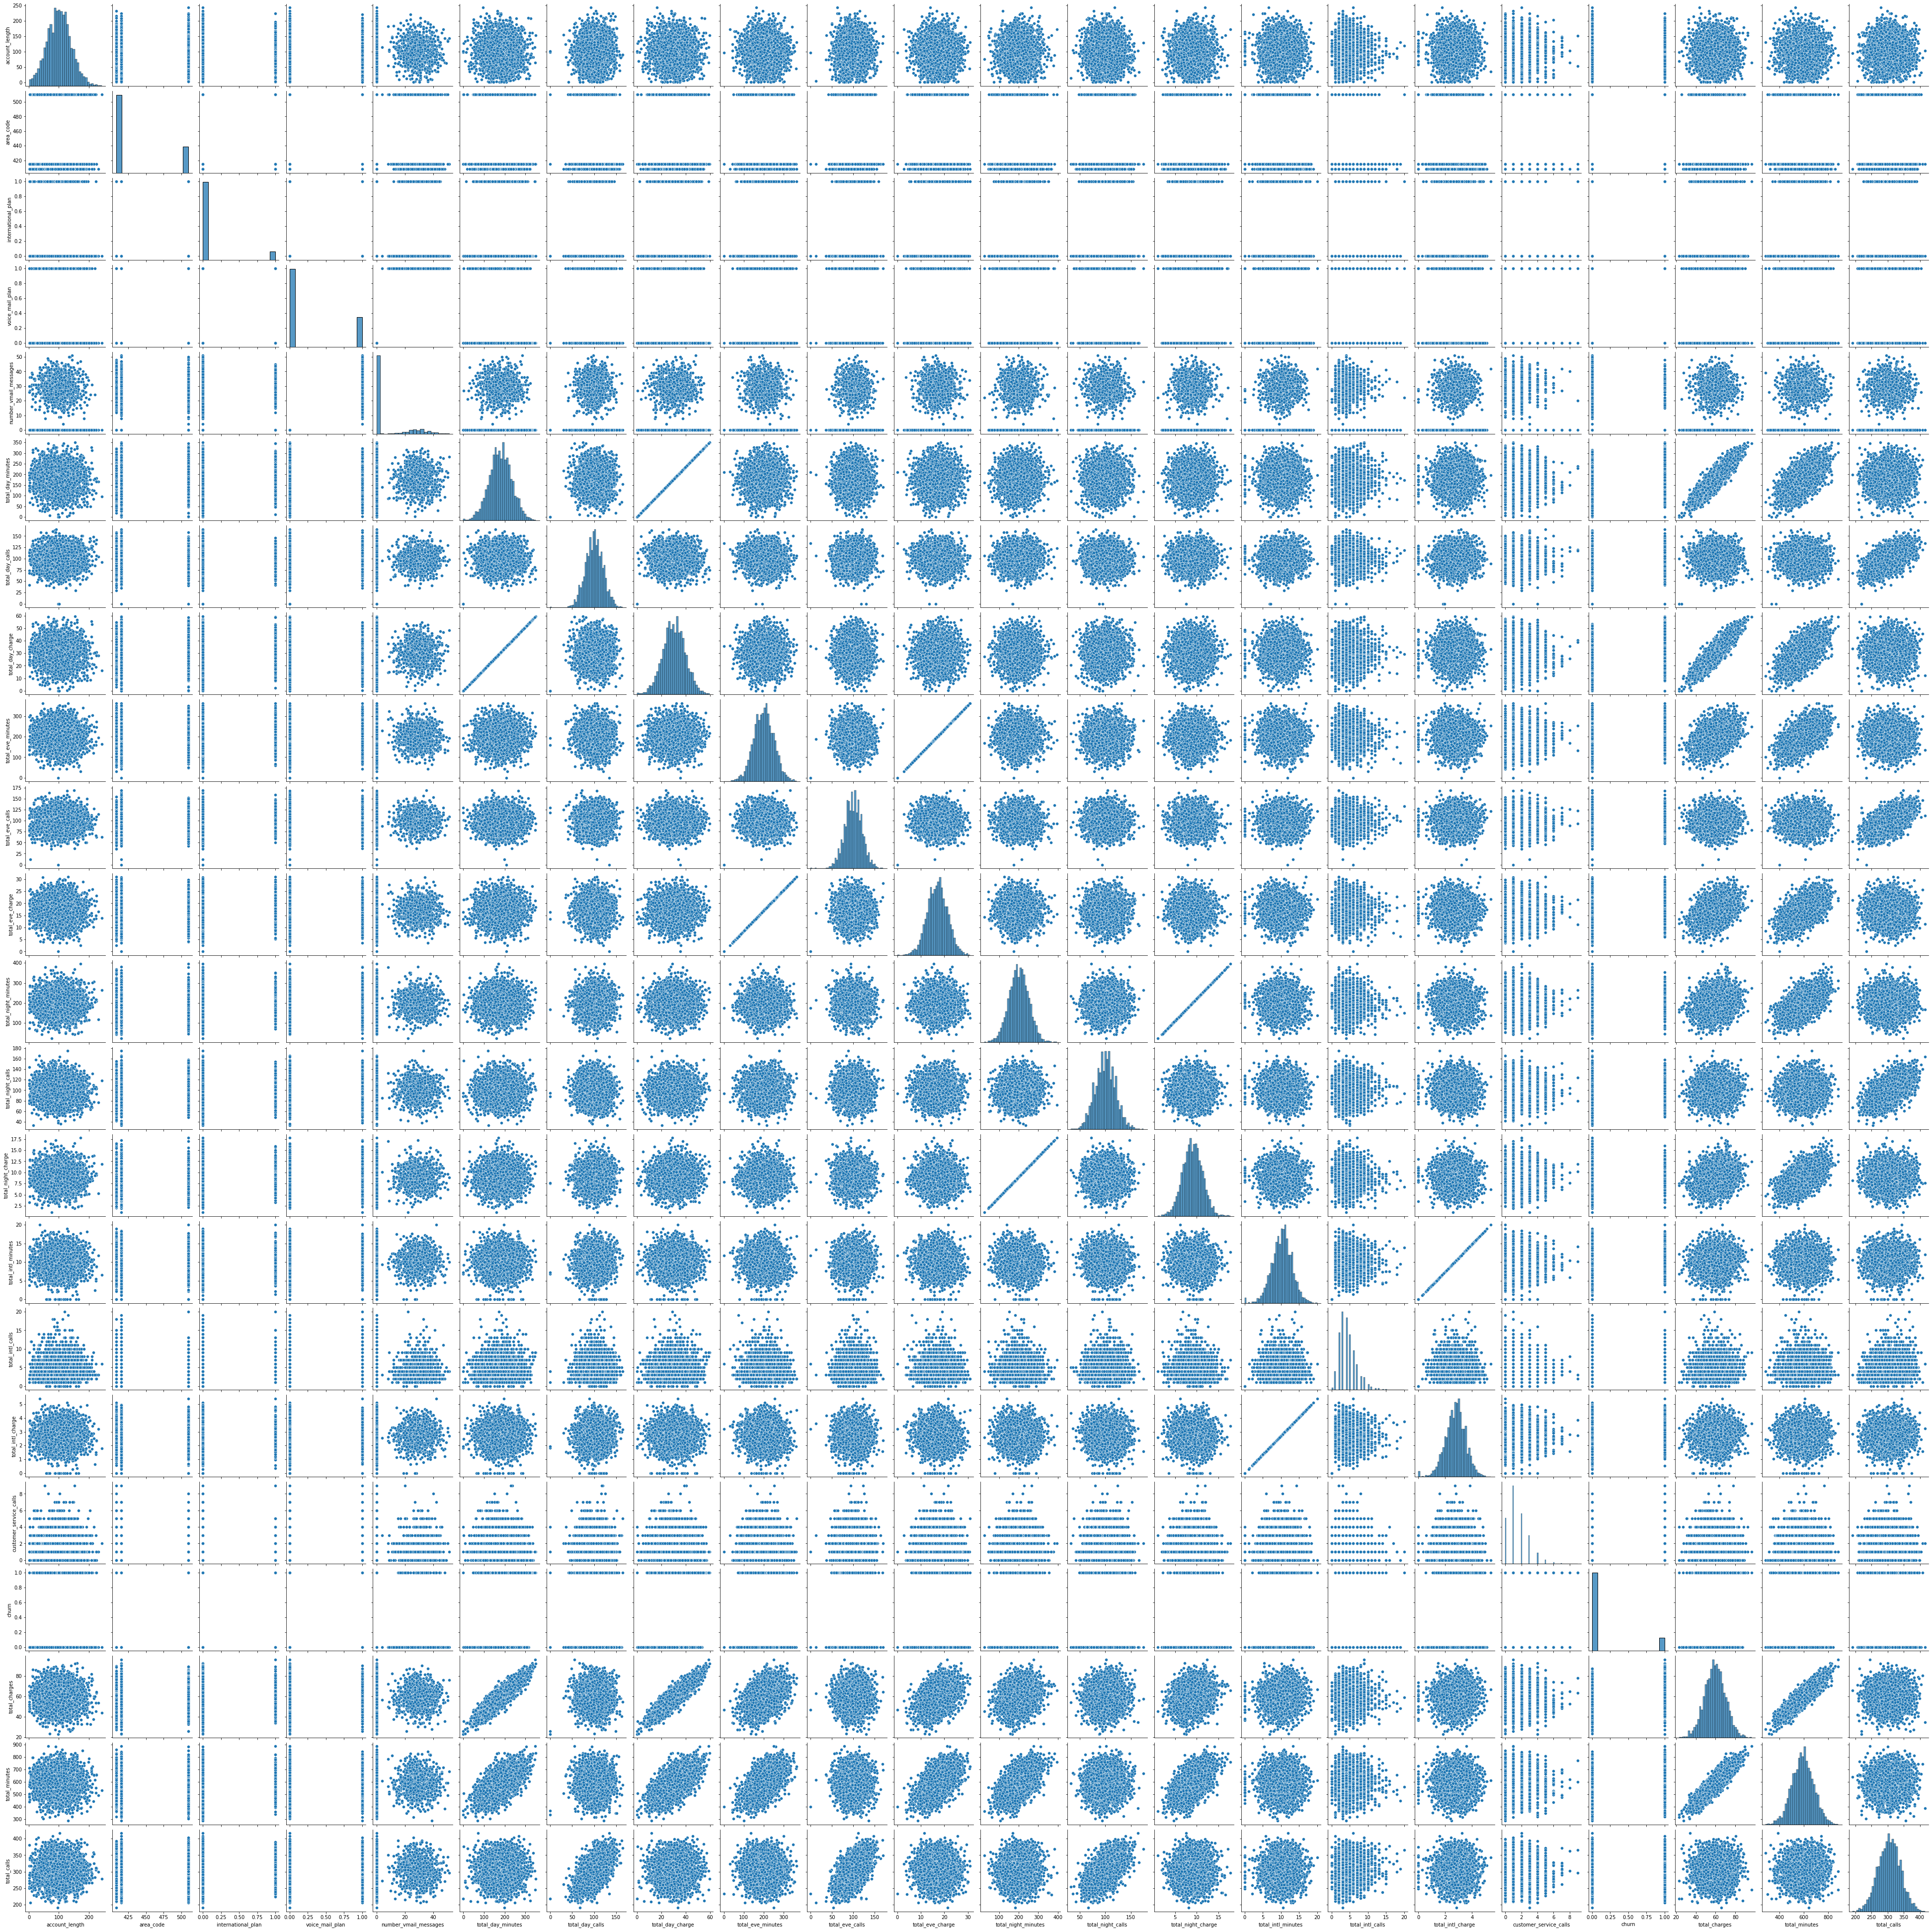

In [60]:
sns.pairplot(df)

<AxesSubplot:>

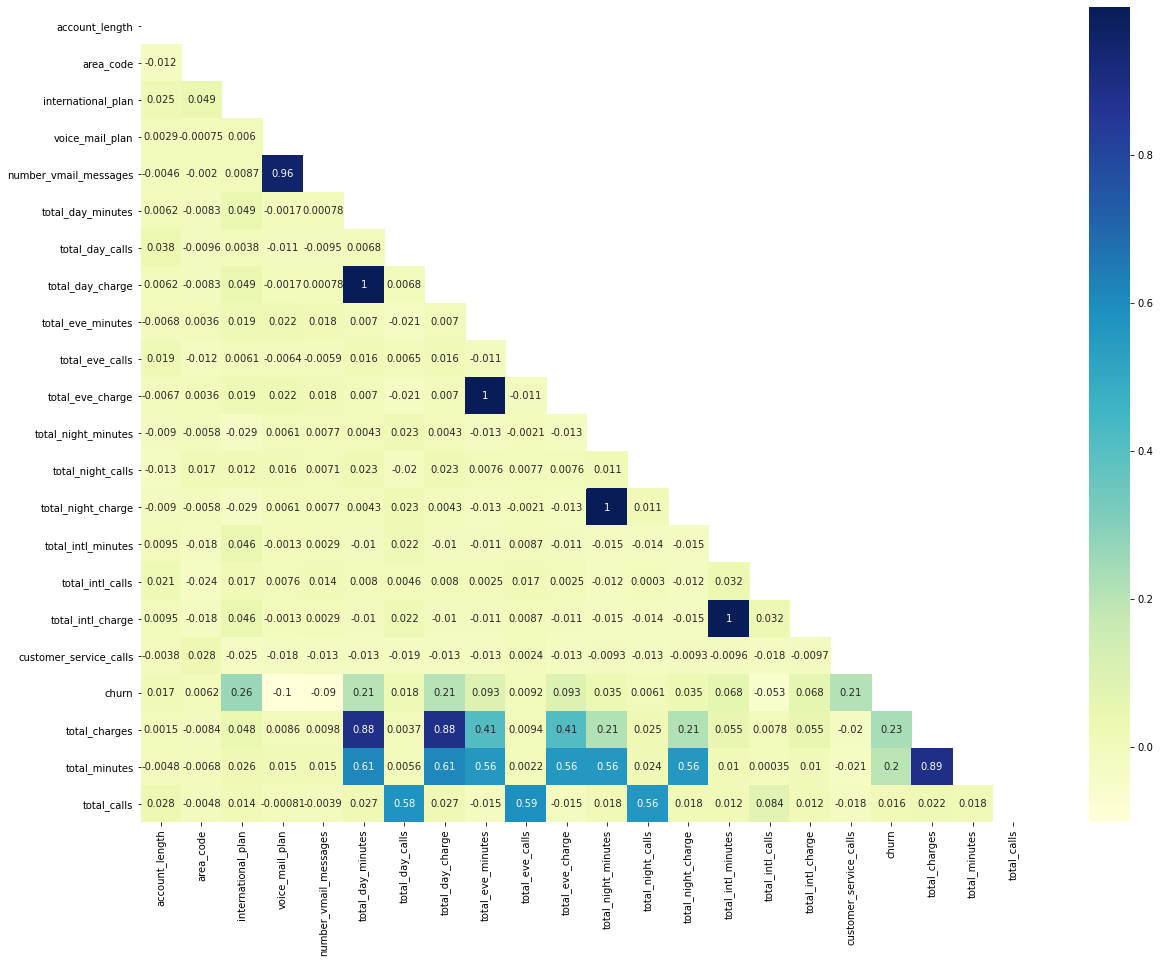

In [232]:
corr = df.corr()
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(corr,cmap="YlGnBu", annot=True,mask = mask, annot_kws={'size':10} )

#### International_plan, Total_charge, and Customer Service Calls are my larges correlated features

### Continuous Variables Outliers Check

array([[<AxesSubplot:title={'center':'total_charges'}>,
        <AxesSubplot:title={'center':'total_minutes'}>],
       [<AxesSubplot:title={'center':'total_calls'}>, <AxesSubplot:>]],
      dtype=object)

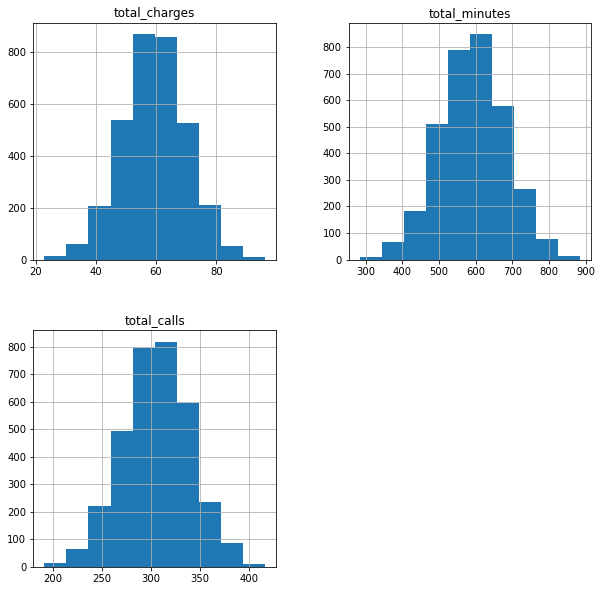

In [57]:
cont= df[['total_charges', 'total_minutes','total_calls']]
cont.hist(figsize=(10,10))

### Distribution of Churn by Area Code

Text(0.5, 0, 'Churn')

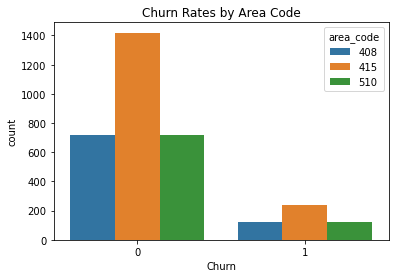

In [43]:
sns.countplot(x= 'churn', hue='area_code', data = df)
plt.title('Churn Rates by Area Code')
plt.xlabel('Churn')

#### Area codes 408 & 510 have almost identical retention and churn rates

### Distribution of Churn by States

In [246]:
 states_churn_val = df.groupby('state')['churn'].value_counts()
states_churn_val_df = pd.DataFrame(states_churn_val)
states_churn_val_df.rename(columns={"churn": "value"},inplace=True)
states_churn_val_df= states_churn_val_df.reset_index()
states_churn_val_df

state  churn  value
0      AK      0     49
1      AK      1      3
2      AL      0     72
3      AL      1      8
4      AR      0     44
..    ...    ...    ...
97     WI      1      7
98     WV      0     96
99     WV      1     10
100    WY      0     68
101    WY      1      9

[102 rows x 3 columns]

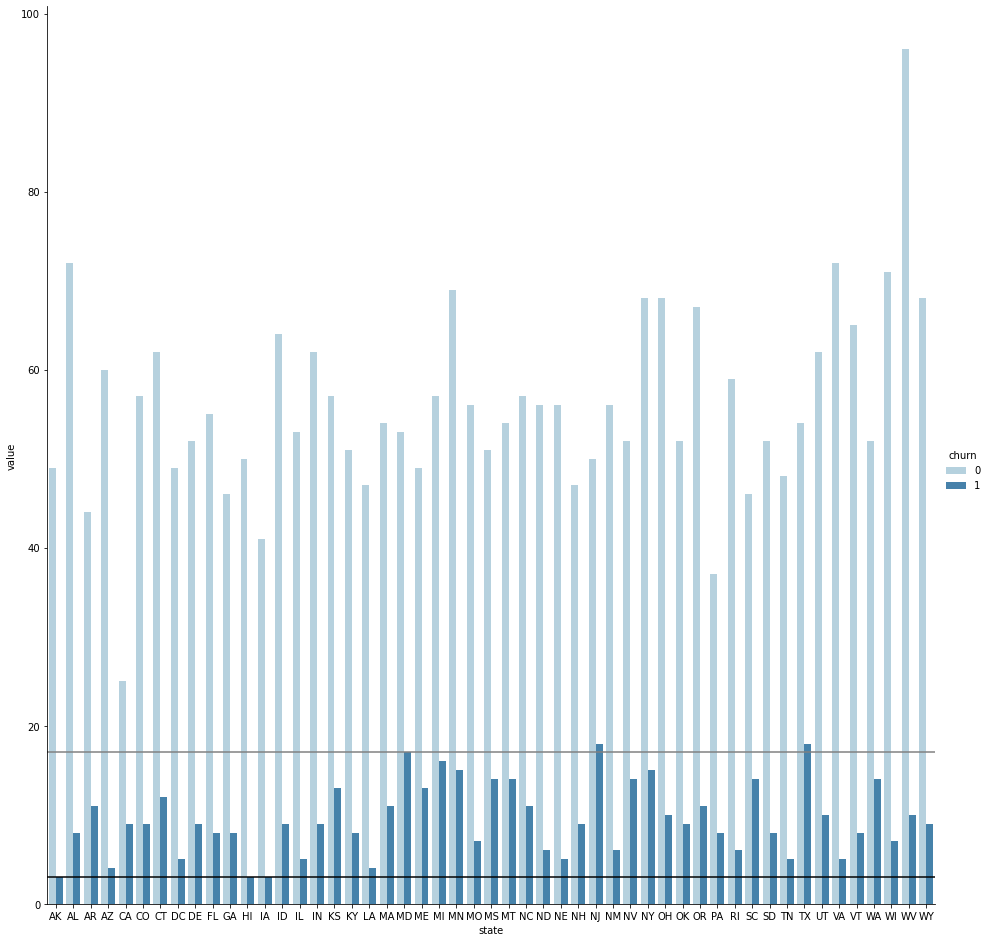

In [252]:
sns.catplot(data=states_churn_val_df, x='state',y='value',hue='churn',kind="bar", palette="Paired",
alpha=0.9,height=13,ci=None)

plt.axhline(y=17,xmin=0, xmax=51, color="gray")
plt.axhline(y=3, xmin=0,xmax=51,color = 'black')

#### Need an annot line to make appropriate cutoff on high churn

In [69]:
states_grouped = states_churn_val_df.copy()
states_grouped.describe()

churn       value
count  102.000000  102.000000
mean     0.500000   32.676471
std      0.502469   24.689422
min      0.000000    3.000000
25%      0.000000    9.000000
50%      0.500000   21.500000
75%      1.000000   54.000000
max      1.000000   96.000000

In [122]:
states_grouped_churn= states_grouped.loc[(states_grouped['churn']== 1)]
states_grouped_churn.sort_values(by='value',ascending=False)
states_grouped_churn.describe()
states_grouped_churn.loc[states_grouped_churn['value']>=17]

state  churn  value
41    MD      1     17
63    NJ      1     18
87    TX      1     18

In [118]:
states_grouped_churn.loc[states_grouped_churn['value']<=3]

state  churn  value
1     AK      1      3
23    HI      1      3
25    IA      1      3

#### MD, TX, and NJ have the highest counts of Churn while
#### HI, AK, and IA have the lowest counts of Churn
#### Dont see a relationship between states or aread codes and likeliness of chrun

### Distribution of Churn by Customer Service Calls

In [286]:
df['customer_service_calls'].value_counts()
churned_df = df.loc[df['churn']==1]
churned_df

state  account_length  area_code  international_plan  voice_mail_plan  \
10      IN              65        415                   0                0   
15      NY             161        415                   0                0   
21      CO              77        408                   0                0   
33      AZ              12        408                   0                0   
41      MD             135        408                   1                1   
...    ...             ...        ...                 ...              ...   
3301    CA              84        415                   0                0   
3304    IL              71        510                   1                0   
3320    GA             122        510                   1                0   
3322    MD              62        408                   0                0   
3323    IN             117        415                   0                0   

      number_vmail_messages  total_day_minutes  total_day_calls  \
10                        0              129.1              137   
15                        0              332.9               67   
21                        0               62.4               89   
33                        0              249.6              118   
41                       41              173.1               85   
...                     ...                ...              ...   
3301                      0              280.0              113   
3304                      0              186.1              114   
3320                      0              140.0              101   
3322                      0              321.1              105   
3323                      0              118.4              126   

      total_day_charge  total_eve_minutes  ...  total_night_calls  \
10               21.95              228.5  ...                111   
15               56.59              317.8  ...                128   
21               10.61              169.9  ...                 64   
33               42.43              252.4  ...                 90   
41               29.43              203.9  ...                 78   
...                ...                ...  ...                ...   
3301             47.60              202.2  ...                103   
3304             31.64              198.6  ...                 80   
3320             23.80              196.4  ...                133   
3322             54.59              265.5  ...                 72   
3323             20.13              249.3  ...                 56   

      total_night_charge  total_intl_minutes  total_intl_calls  \
10                  9.40                12.7                 6   
15                  7.23                 5.4                 9   
21                  9.43                 5.7                 6   
33                 12.61                11.8                 3   
41                  5.50                14.6                15   
...                  ...                 ...               ...   
3301                7.06                10.4                 4   
3304                9.29                13.8                 5   
3320                5.40                 9.7                 4   
3322                8.12                11.5                 2   
3323               10.22                13.6                 3   

      total_intl_charge  customer_service_calls  churn  total_charges  \
10                 3.43                       4      1          54.20   
15                 1.46                       4      1          92.29   
21                 1.54                       5      1          36.02   
33                 3.19                       1      1          79.68   
41                 3.94                       0      1          56.20   
...                 ...                     ...    ...            ...   
3301               2.81                       0      1          74.66   
3304               3.73                       4      1   

In [434]:
#Churn Rate by Calls

call_churn_rate=[]

# for x in range(len(df['customer_service_calls'])):
#     print(x)

for x in range(0,10):
        call_churn_rate.append(round(sum(churned_df['customer_service_calls'] >= x) / 
                             sum(df['customer_service_calls'] >= x) * 100, 0))
call_churn2= list(enumerate(call_churn_rate))

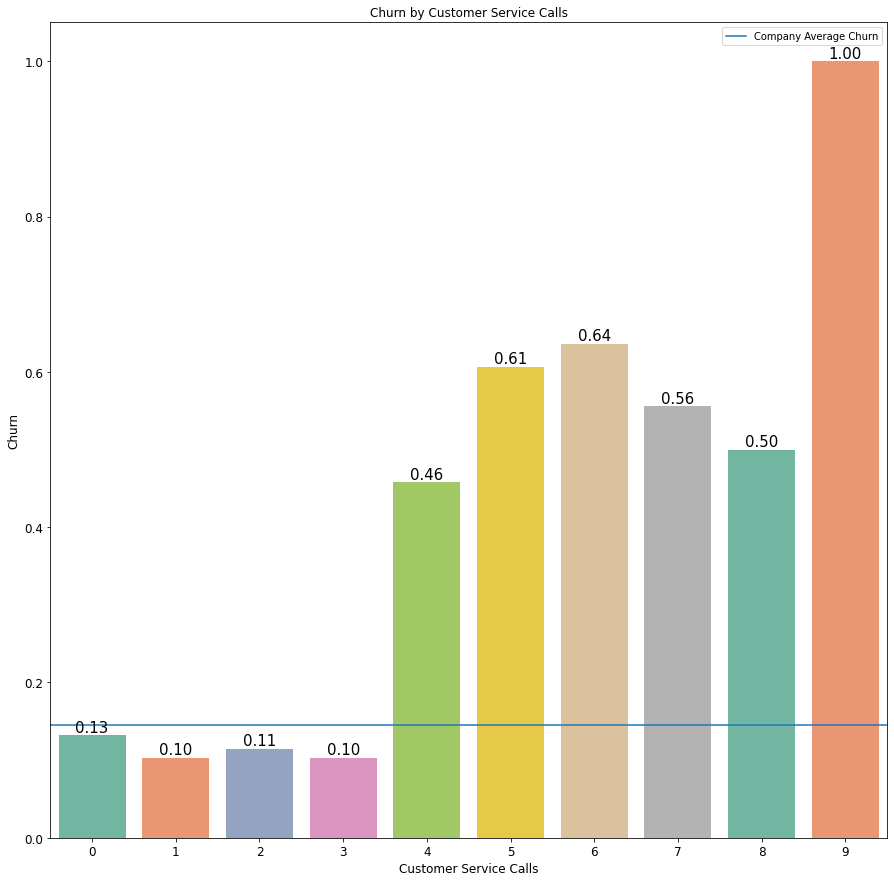

In [438]:
plt.subplots(figsize=(15,15))

plots = sns.barplot(x='customer_service_calls', y ='churn', data =df, palette = ("Set2"),ci=None)

plt.axhline(y=0.145,xmin=-1,xmax=10,label='Company Average Churn')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.title('Churn by Customer Service Calls')
plt.xlabel('Customer Service Calls',fontsize=12)
plt.ylabel('Churn',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

### Evidently noted that as the number of customer service calls increase the likelihood of churning increases as well. Drastic increase after the 3rd call

### Distribution of Churn by International Plan 

In [184]:
international_plan = df.loc[df['international_plan']==1]
international_plan_churn = international_plan['churn'].value_counts(normalize=True)


international_plan_churn = pd.DataFrame(international_plan_churn)
international_plan_churn = international_plan_churn.reset_index()

international_plan_churn.rename(columns={'index':'churn', 'churn':'rate'},inplace=True)
international_plan_churn

churn      rate
0      0  0.575851
1      1  0.424149

In [173]:
no_international_plan = df.loc[df['international_plan']==0]
no_international_plan_churn = no_international_plan['churn'].value_counts(normalize=True)

no_international_plan_churn = pd.DataFrame(no_international_plan_churn)
no_international_plan_churn= no_international_plan_churn.reset_index()

no_international_plan_churn.rename(columns={'index':'churn', 'churn':'rate'},inplace=True)
no_international_plan_churn

churn     rate
0      0  0.88505
1      1  0.11495

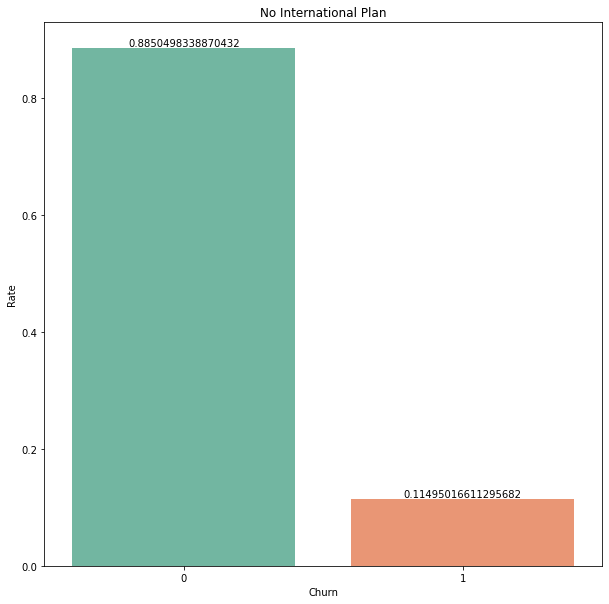

In [226]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data =no_international_plan_churn, x='churn', y='rate',palette=('Set2'))
plt.title('No International Plan')
for p,rate in zip(ax.patches, no_international_plan_churn['rate']):
    ax.annotate(rate, xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.xlabel('Churn')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

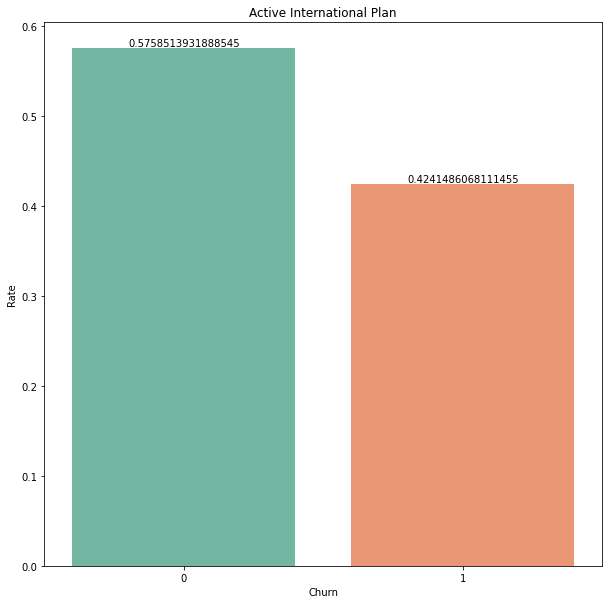

In [281]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=international_plan_churn, x='churn', y="rate",palette=('Set2'))


plt.title('Active International Plan')


for p,rate in zip(ax.patches, international_plan_churn['rate']):
    ax.annotate(rate, xy=(p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
    
plt.xlabel('Churn')
plt.ylabel('Rate')

#### Individuals with an active international plan in place are 42.4% more likely to churn compared to individuals that do not have one in place (11.5% Churn)

### Distribution of Churn by Total Charges (Day, Evening, Night)

<AxesSubplot:xlabel='total_charges', ylabel='Count'>

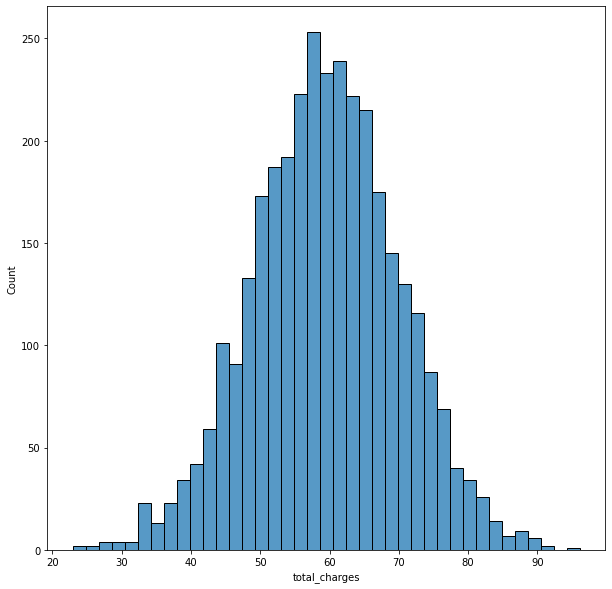

In [408]:
plt.subplots(figsize=(10,10))
sns.histplot(df['total_charges'])

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

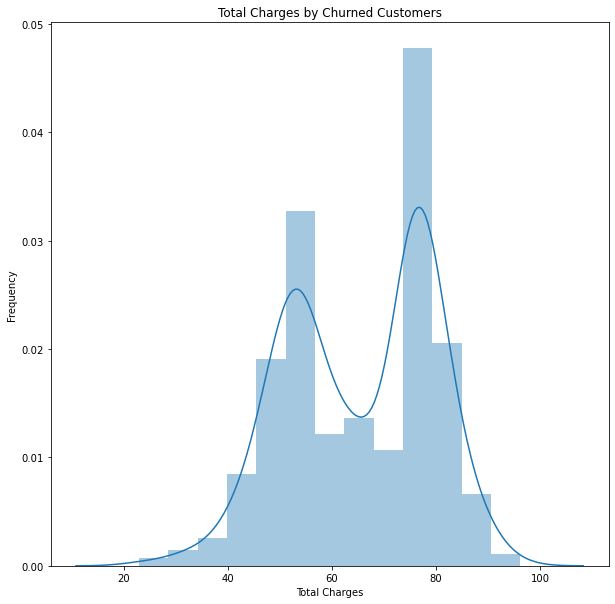

In [419]:
plt.subplots(figsize=(10,10))
churned_charges= churned_df['total_charges']
sns.distplot(churned_charges)
plt.title('Total Charges by Churned Customers')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Total Charges')

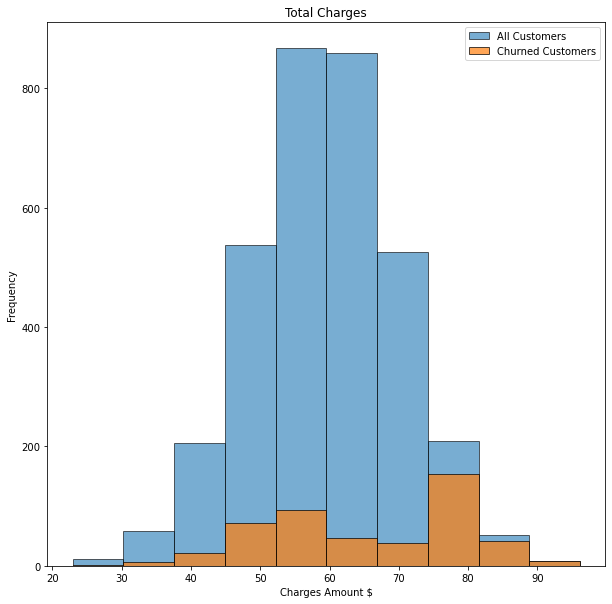

In [424]:
plt.figure(figsize=(10,10))
plt.hist(df['total_charges'],alpha=0.6,label='All Customers',edgecolor = "black")
plt.hist(churned_df['total_charges'],alpha=0.7,label='Churned Customers',edgecolor = "black")
plt.xlabel('Charges Amount $')
plt.ylabel('Frequency')
plt.legend()
plt.title('Total Charges')

### EDA Conclusion

- States like **New Jersey, Texas, and Maryland** are among those that have the highest churn rate while states with the lowest include **Hawaii, Alaska, and Iowa**. With the current data set I dont have much to draw conclusions on why this 

- **Customer Service Calls** is my largest contributor on churn rates, when customers make more than 4 calls the likeliness of churn doubles. The more calls to customer service the higer the dissatifaction

- when regarding ** Charged Amount ** the distribution is bimodal which means that there is 